**Logistic Regression**: The target variable has three or more nominal categories such as predicting the type of Wine. Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5. Model building in Scikit-learn Let's build the diabetes prediction model.

Here, We are going to predict Coronary Heart Disease using Logistic Regression Classifier.

Let's first load the required Coronary Heart Disease dataset using the pandas' read CSV function. 

We will download data from the following link: https://www.kaggle.com/datasets/billbasener/coronary-heart-disease?resource=download

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Machine Learning/Colab Notebooks/ML_Practicals/1_Practical/Logistic regression P2

/content/gdrive/MyDrive/Machine Learning/Colab Notebooks/ML_Practicals/1_Practical/Logistic regression P2


In [ ]:
ls


CHDdata.csv  CHD_Data.csv  CHDdata.gsheet  Logistic_Regression.ipynb


In [ ]:
import pandas as pd
col_names = ['Systolic BP', 'Tobacco', 'low-density lipoprotein', 'Adiposity', 'Famhist', 'typea', 'Obesity', 'Alcohol', 'Age', 'Chd']
# load dataset
CHD = pd.read_csv("CHD_Data.csv", header=None, names=col_names)

**Context**

The data set CHDdata.csv contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (Idl), adiposity, family history (0 or 1), type A personality score (typea), obesity (body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).

In [ ]:
CHD.head()

,Systolic BP,Tobacco,low-density lipoprotein,Adiposity,Famhist,typea,Obesity,Alcohol,Age,Chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
CHD.tail()

,Systolic BP,Tobacco,low-density lipoprotein,Adiposity,Famhist,typea,Obesity,Alcohol,Age,Chd
458,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
459,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
460,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
461,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
462,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [ ]:
CHD.drop('Famhist', inplace=True, axis=1)

**Selecting Feature** Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Systolic BP', 'Tobacco', 'low-density lipoprotein', 'Adiposity', 'typea', 'Obesity', 'Alcohol', 'Age', ]
X = CHD[feature_cols] # Features
y = CHD.Chd # Target variable

**Splitting Data**
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). We need to pass 3 parameters features, target, and test_set size. Additionally, We can use random_state to select records randomly.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.65,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

**Model Development and Prediction**
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit our model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **Model Evaluation using Confusion Matrix**
A confusion matrix is a table that is used to evaluate the performance of a classification model. We can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[174,  28],
       [ 56,  43]])

Here, we can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. We have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 174 and 28 are actual predictions, and 56 and 43 are incorrect predictions.

Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, we will visualize the confusion matrix using Heatmap.

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted Chd')

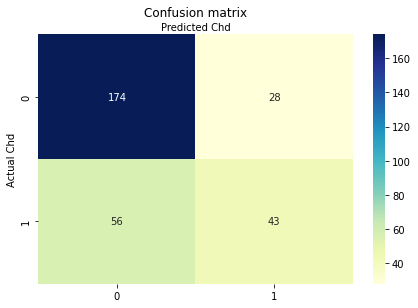

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Chd')
plt.xlabel('Predicted Chd')

**Confusion Matrix Evaluation Metrics**
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7209302325581395
Precision: 0.6056338028169014
Recall: 0.43434343434343436


Well, we got a classification rate of 72%, considered as good accuracy.

**Precision:** Precision is about being precise, i.e., how accurate our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 60% of the time.

**Recall:** If there are patients who have diabetes in the test set and our Logistic Regression model can identify it 43% of the time.

**ROC Curve** 
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

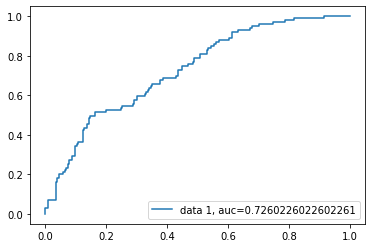

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score for the case is 0.73. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.


**Conclusion**
In this Notebook we were able to measure and evaluate the Accuracy, Recall, Precision of the data thoroughly.